In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import _pickle as cPickle
import joblib
import gzip
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
train = pd.read_csv("train.csv", nrows = 100000000)
test = pd.read_csv("train.csv", nrows = 1000000)

C:\Users\ashut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.shape

(100000000, 21)

In [4]:
test.tail()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
999995,0b92c3446e6f6d4e6ff5f1229755f466a56114e6,05/22/2019 07:15:00 PM,05/22/2019 07:45:00 PM,"2,215",14.125702,NaN,NaN,76.0,29.0,22.5,...,0.00,22.50,True,1,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.860190,-87.717220,POINT (-87.7172201 41.8601900192)
999996,0b92c4cccb3286dbf8237ddda6c719c091ed4ec3,06/14/2019 07:00:00 PM,06/14/2019 07:15:00 PM,447,1.548885,1.703132e+10,1.703108e+10,32.0,8.0,10.0,...,7.55,17.55,False,1,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.891972,-87.612945,POINT (-87.6129454143 41.8919715078)
999997,0b92c59b827a39dc60c4c9d76bbc707012e18ecb,05/23/2019 08:30:00 PM,05/23/2019 09:00:00 PM,"1,803",11.799726,NaN,NaN,35.0,22.0,12.5,...,2.55,15.05,True,5,41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)
999998,0b92c68fcb00ae78b3a49bf5d5322158ab36169e,04/17/2019 10:30:00 PM,04/17/2019 10:45:00 PM,311,1.363512,1.703106e+10,1.703107e+10,6.0,7.0,5.0,...,2.55,7.55,False,1,41.942692,-87.651771,POINT (-87.6517705068 41.9426918444),41.921778,-87.651062,POINT (-87.6510618838 41.9217781876)
999999,0b92c7ace0b53a9a790016efae1e163cfb9546fd,06/13/2019 11:00:00 AM,06/13/2019 11:15:00 AM,"1,238",3.239090,1.703184e+10,1.703184e+10,34.0,32.0,2.5,...,2.55,5.05,True,3,41.851018,-87.635092,POINT (-87.6350918563 41.8510178239),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [5]:
train.drop(train.columns[[2,3,4,5,6,7,8,9,10,11,13,17,20]], axis=1, inplace=True)
train.rename(columns={'Trip ID' : 'key','Trip Total' : 'fare_amount','Pickup Centroid Latitude' : 'pickup_latitude',
                         'Pickup Centroid Longitude' : 'pickup_longitude','Dropoff Centroid Latitude' : 'dropoff_latitude',
                         'Dropoff Centroid Longitude' : 'dropoff_longitude','Trip Start Timestamp' : 'trip_start_timestamp',
                         'Trip Start Timestamp' : 'pickup_datetime','Trip End Timestamp' : 'dropoff_datetime',
                         'Trips Pooled' : 'passenger_count'},inplace=True)



test.drop(test.columns[[2,3,4,5,6,7,8,9,10,11,13,17,20]], axis=1, inplace=True)
test.rename(columns={'Trip ID' : 'key','Trip Total' : 'fare_amount','Pickup Centroid Latitude' : 'pickup_latitude',
                         'Pickup Centroid Longitude' : 'pickup_longitude','Dropoff Centroid Latitude' : 'dropoff_latitude',
                         'Dropoff Centroid Longitude' : 'dropoff_longitude','Trip Start Timestamp' : 'trip_start_timestamp',
                         'Trip Start Timestamp' : 'pickup_datetime','Trip End Timestamp' : 'dropoff_datetime',
                         'Trips Pooled' : 'passenger_count'},inplace=True)


In [6]:
train.shape

(100000000, 8)

In [7]:
test.shape

(1000000, 8)

In [8]:
train.head(10)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,02834e788438c1a13d16cb28cdf87c99190ecdc0,06/24/2019 06:15:00 AM,15.05,1,41.929273,-87.673807,41.895033,-87.619711
1,02834f5efdea47320ada480120dc6e072067d4c2,04/15/2019 07:15:00 AM,7.55,1,41.879255,-87.642649,41.892042,-87.631864
2,0283504d3c2b344de5313888add975fb7e5925a2,04/20/2019 01:15:00 AM,45.8,1,41.892042,-87.631864,NaN,NaN
3,028351cc4ab81ee329f17f87ba9929dc05cc31f7,04/01/2019 05:30:00 PM,12.55,1,41.880994,-87.632746,41.891972,-87.612945
4,02835257f57cf1340a80f22d9cce2df3d99dd07d,06/27/2019 08:00:00 PM,7.55,1,41.936310,-87.651563,41.938232,-87.646782
5,028352cc786a58f5d2e87712e72bb1ef42e15371,04/01/2019 04:00:00 AM,10.05,1,41.949140,-87.656804,41.942873,-87.701330
6,028353342a2208443d9c3bc50f0cee10b84bb93a,06/19/2019 07:30:00 AM,49.55,1,41.979071,-87.903040,41.884987,-87.620993
7,028353b91185c3b8435e484c2e285a0bca57bff1,06/25/2019 05:45:00 PM,13.05,1,41.963374,-87.670185,41.941628,-87.661443
8,028353cbbf604ee971bdf5296ff97899b36891ad,04/05/2019 06:00:00 PM,20.05,1,41.879067,-87.657005,41.963633,-87.652365
9,028354306c9c537e31b85934476a3c28fc4e8005,05/27/2019 10:00:00 PM,17.55,1,41.839087,-87.714004,NaN,NaN


In [9]:
train.describe()

,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.000000e+08,9.394668e+07,9.394668e+07,9.319769e+07,9.319769e+07
mean,1.272790e+00,4.189270e+01,-8.766666e+01,4.189335e+01,-8.766849e+01
std,7.441421e-01,6.102187e-02,6.212131e-02,6.109966e-02,6.579549e-02
min,1.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01
25%,1.000000e+00,4.187741e+01,-8.768016e+01,4.187859e+01,-8.768300e+01
50%,1.000000e+00,4.189322e+01,-8.765177e+01,4.189322e+01,-8.765169e+01
75%,1.000000e+00,4.192908e+01,-8.763172e+01,4.192933e+01,-8.763172e+01
max,2.400000e+01,4.202122e+01,-8.752995e+01,4.202122e+01,-8.752995e+01


In [10]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

dropoff_longitude    6802313
dropoff_latitude     6802313
pickup_longitude     6053317
pickup_latitude      6053317
fare_amount              130
passenger_count            0
pickup_datetime            0
key                        0
dtype: int64

In [11]:
#check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

dropoff_longitude    68256
dropoff_latitude     68256
pickup_longitude     61031
pickup_latitude      61031
passenger_count          0
fare_amount              0
pickup_datetime          0
key                      0
dtype: int64

In [12]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [13]:
train.shape

(87163394, 8)

In [14]:
#check the target column
train['fare_amount'].describe()

count     87163394.00
unique       14934.00
top              7.55
freq      13450031.00
Name: fare_amount, dtype: float64

Fare amount has a negative value, which doesn't make sense. Remove these fields

In [15]:
#38 fields have negative fare_amount values.
#from collections import Counter
#Counter(train['fare_amount']<0)
train['fare_amount'] = train['fare_amount'].astype(float)
train.dtypes

key                   object
pickup_datetime       object
fare_amount          float64
passenger_count        int64
pickup_latitude      float64
pickup_longitude     float64
dropoff_latitude     float64
dropoff_longitude    float64
dtype: object

In [16]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(87163394, 8)

In [17]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    8.716339e+07
mean     1.325930e+01
std      9.021291e+00
min      0.000000e+00
25%      7.550000e+00
50%      1.005000e+01
75%      1.505000e+01
max      8.921000e+02
Name: fare_amount, dtype: float64

In [18]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False)

19708193    892.10
143994      822.10
22312671    786.10
37356090    752.10
82230220    721.55
             ...  
11033865      0.00
27144851      0.00
17801047      0.00
21518829      0.00
21487097      0.00
Name: fare_amount, Length: 87163394, dtype: float64

Next check the passenger_count variable

In [19]:
train['passenger_count'].describe()

count    8.716339e+07
mean     1.281803e+00
std      7.587192e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.400000e+01
Name: passenger_count, dtype: float64

In [20]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
89,028380efe2227f2ffc4596c95624d619c11ed4bc,04/18/2019 06:15:00 PM,2.55,7,41.810879,-87.726363,41.810879,-87.726363
316,0284025c1d6f36ba641a75c0bfc061c3e9b64a29,06/05/2019 04:15:00 PM,5.05,7,41.895258,-87.733518,41.868132,-87.714215
1692,028725dbd0ce60356946f072a3f53ac74df2a25e,06/16/2019 02:15:00 PM,9.62,7,41.789788,-87.708417,41.814441,-87.730733
2922,0289f07f083ee04500a481fb66b8d48de599b6f8,04/30/2019 03:45:00 PM,10.05,7,41.878866,-87.625192,41.835118,-87.618678
3326,028ae9f3ce752eedd5232561b097a03e7706d474,05/21/2019 09:45:00 PM,7.55,7,41.909496,-87.630964,41.790506,-87.583144
...,...,...,...,...,...,...,...,...
99997062,21d0ff13954e8353348a10ecd9478f4a4c734ffa,02/01/2019 11:45:00 PM,7.55,7,41.836510,-87.653159,41.790506,-87.583144
99998078,21d30783cce246725cb3f776226ce5ba325f3401,03/20/2019 09:30:00 AM,22.55,7,41.769778,-87.726930,41.878866,-87.625192
99998228,21d34ff1af8c3064f50b9a3e0feb4810b961821f,03/11/2019 02:15:00 PM,10.05,9,41.868132,-87.714215,41.890922,-87.618868
99999075,21d50d6f6a78df8d3bb5d1a381ac4db5be8d8d5a,03/10/2019 12:15:00 AM,7.55,8,41.744205,-87.656306,41.740206,-87.615970


In [21]:
train = train.drop(train[train['passenger_count']>6].index, axis = 0)

In [22]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    8.702954e+07
mean     1.271906e+00
std      7.146649e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [ ]:
train['key'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
train['pickup_datetime']

In [ ]:
#Convert for test data
test['key'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])
test['pickup_datetime']

In [ ]:
#check the dtypes after conversion
train.dtypes

In [ ]:
test.dtypes

In [ ]:
#check the train data
train.head()

In [ ]:
#check the test data
test.head()

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        #R = 6371  #radius of earth in kilometers
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in miles
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [ ]:
train['H_Distance'].head(10)

In [ ]:
test['H_Distance'].head(10)

In [ ]:
train.head(10)

In [ ]:
test.tail(10)

Now that we have calculated the distance, we shall create columns for the following - 
* year
* month
* date
* hour
* day of week

In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [ ]:
train.head()

In [ ]:
test.head()

**1. Does the number of passengers affect the fare? **

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?  

**3. Does the day of the week affect the fare?**

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Nah, day of the week doesn't seem to have that much of an influence on the number of cab rides

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work, or grab a drink from close by. Hmmm..

**4. Does the distance affect the fare?**

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [ ]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

In [ ]:
len(train)

In [ ]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [ ]:
Counter(dist_bins['bins'])

There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following - 
1.  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
2. vice versa of point 1.
3. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [ ]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

In [ ]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [ ]:
#1 row dropped
train.shape

In [ ]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]
#No records! PHEW!

In [ ]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

In [ ]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [ ]:
#3 rows dropped
train.shape

In [ ]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

Check the H_Distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [ ]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [ ]:
high_distance

1938 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula 

> *distance = (fare_amount - 2.5)/1.56*

In [ ]:
high_distance.shape

In [ ]:
#high_distance['H_Distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56,axis=1)

In [ ]:
#The distance values have been replaced by the newly calculated ones according to the fare
#high_distance

In [ ]:
#sync the train data with the newly computed distance values from high_distance dataframe
#train.update(high_distance)

In [ ]:
#train.shape

Now we shall check for rows where the distance values are 0

In [ ]:
train[train['H_Distance']==0]

We can see a few rows with distance =0. This could be due to 2 reasons 
1. The cab waited the whole time and the passenger eventually cancelled. *That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.*
2. The pickup and drop co-ordinates were not entered. In other words, these are **missing values**!

28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices  - 

* $$2.5 base-price  +  $1.56/km --> 6AM to 8PM Mon-Fri

* $$3.0 base-price  +  $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

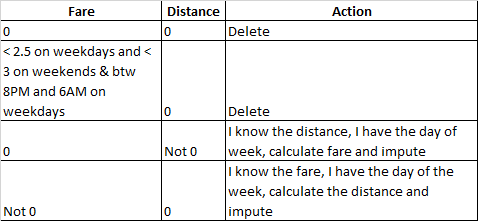


**SCENARIO 1**

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [ ]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them 

In [ ]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [ ]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

**SCENARIO 2**

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [ ]:
#Between 8AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=8)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.25))]
rush_hour

In [ ]:
train=train.drop(rush_hour.index, axis=0)

In [ ]:
train.shape

In [ ]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<8)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.75))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

In [ ]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.5)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare (not sure how this works in NYC, but I'm assuming that's how it is)

**SCENARIO 3**

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula
> *fare = 2.5 + 1.56(H_Distance)*

In [ ]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [ ]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [ ]:
len(scenario_3)

In [ ]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

In [ ]:
#scenario_3['fare_amount'] = scenario_3.apply(lambda row: ((row['H_Distance'] * 1.80) + 3.25), axis=1)

In [ ]:
scenario_3['fare_amount']

In [ ]:
train.update(scenario_3)

In [ ]:
train.shape

**SCENARIO 4**

Fare is  not 0, but Distance is 0. These values need to be imputed.

In [ ]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [ ]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [ ]:
len(scenario_4)

In [ ]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.75)&(scenario_4['H_Distance']==0)]

In [ ]:
scenario_4.loc[(scenario_4['fare_amount']>3.75)&(scenario_4['H_Distance']==0)]

These 27159 rows need to be imputed using the following formula - 
> *distance = (fare_amount - 2.5)/1.56*

In [ ]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.75)&(scenario_4['H_Distance']==0)]

In [ ]:
len(scenario_4_sub)

In [ ]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-3.25)/2.25), axis=1
)

#scenario_3['fare_amount'] = scenario_3.apply(
#    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
#)

In [ ]:
train.update(scenario_4_sub)

In [ ]:
train.shape

In [ ]:
train = train.apply (pd.to_numeric, errors='coerce')
train = train.dropna()
test = test.apply (pd.to_numeric, errors='coerce')
test = test.dropna()

**PART 2 --> MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
x_train = train.iloc[:,train.columns!='fare_amount']
#features = ['Day of Week','Hour', 'H_Distance', 'passenger_count']
#x_train = train[features].values
y_train = train['fare_amount'].values
#del test['fare_amount']
x_test = test

In [ ]:
del test['fare_amount']

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.columns

In [ ]:
test.head()

In [ ]:
x_test.columns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
print(rf_predict)

In [ ]:
#pickle.dump(rf, open('model.pkl','wb'))
import joblib
import gzip
#with gzip.GzipFile(filename + '.gz', 'wb', compresslevel=3) as fo:  
joblib.dump(rf, gzip.GzipFile('model' + '.lzma', 'wb', compresslevel=3))
#with gzip.GzipFile(filename + '.gz', 'rb') as fo:  
#oblib.load(fo)

In [ ]:
#model = pickle.load(open('model.pklz','rb'))
#model = joblib.load(gzip.GzipFile('model_1' + '.lzma', 'rb'))

In [ ]:
#Xnew = [[1,41.8826,-87.6226,41.8406176,-87.6159749,3.9,2019,11,18,1,18]]

In [ ]:
#ynew = model.predict(Xnew)

In [ ]:
#ynew

In [ ]:
#submission = pd.read_csv('sample_submission.csv')
#submission['fare_amount'] = rf_predict
#submission.to_csv('submission_1.csv', index=False)
#submission.head(20)